## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Step 1: Importing and Inspecting the Data

In [1]:
# Supress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 500)

In [3]:
# Importing dataset

lead_df = pd.read_csv('Leads.csv')

In [4]:
# Checking few records

lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead_df.nunique().sort_values()

Get updates on DM Content                           1
I agree to pay the amount through cheque            1
Receive More Updates About Our Courses              1
Magazine                                            1
Update me on Supply Chain Content                   1
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
A free copy of Mastering The Interview              2
Search                                              2
Newspaper Article                                   2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
What matters most to you in choosing a course       3
Asymmetrique Activity Index                         3
Asymmetrique Profile Index                          3
Lead Origin                 

We can see above that there are many categorical fields. Lead Number or Prospect ID columns are having all unique values. These columns can be dropped as it will not be relevant for the analysis.

In [6]:
lead_df.drop(['Prospect ID', 'Lead Number'], 1, inplace=True)

In [7]:
lead_df.shape

(9240, 35)

In [8]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

 ## Step 2: Data Cleaning

#### Missing/ Null Value treatment

In [9]:
(lead_df.isnull().sum()/9240)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

### Observations - 
The above data and null percentage shows that there are many fields with a high percentage of missing values. We need to remove the columns that have missing values more than 45% as imputing them will be incorrect and impact the model prediction.

Below are the few fields that needs to be deleted:
Lead Quality, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score 

In [10]:
lead_df.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis =1,inplace = True)

In [11]:
# Looking at columns where missing values are very less (< 10%)

null_value = round((lead_df.isnull().sum()/9240)*100,2)
less_null_value = null_value[null_value < 10]
less_null_value

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Content                   0.00
I agree to pay the amount through cheque    0.00
A free copy of Maste

 ### Observations - 
The data given above shows that there are a few fields like Last Activity, Lead Source,  TotalVisits, Page Views Per Visit where there are few missing values. As the number of missing values is very less, there are options to either delete them or impute them with mean/median/mode value. Let's go with imputation rather deleting the data.

In [12]:
# Let's look at the value of 'Lead Source' to understand its type of value.

lead_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
NC_EDM                  1
Pay per Click Ads       1
youtubechannel          1
WeLearn                 1
blog                    1
testone                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

The above data shows that it is a categorical field. So let's impute missing values with mode.

In [13]:
# Find the mode value of Lead Source
lead_df['Lead Source'].mode()

0    Google
dtype: object

### Observations - 
There are 5 records under google which can be merged with Google. Also, Facebook can be merged with Social media. Rest of the values which are <10 can be put into a category names 'Other'.

In [14]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace('google','Google')
lead_df['Lead Source'] = lead_df['Lead Source'].replace('Facebook','Social Media')

In [15]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat','testone','youtubechannel','Pay per Click Ads','welearnblog_Home','NC_EDM','WeLearn','blog'],'Other')

In [16]:
# Imputing Lead Source missing values with mode which is 'Google'
lead_df['Lead Source'] = lead_df['Lead Source'].fillna(lead_df['Lead Source'].mode()[0])

In [17]:
# Final categories

lead_df['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Other                 21
Name: Lead Source, dtype: int64

In [18]:
# Let's look at the value of 'Last Activity' to understand its type of value.
lead_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [19]:
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Other')

The above data shows it is a categorical variable so let's check the mode value which can be used to impute missing values.

In [20]:
lead_df['Last Activity'].mode()

0    Email Opened
dtype: object

In [21]:
# Imputation with mode
lead_df['Last Activity'] = lead_df['Last Activity'].fillna(lead_df['Last Activity'].mode()[0])

In [22]:
# Final Categories
lead_df['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Other                          21
Name: Last Activity, dtype: int64

In [23]:
lead_df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
Email Received                     1
Form Submitted on Website          1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [24]:
# We can drop Last Notable Activity as it's quite similar to Last Activity column.
lead_df.drop('Last Notable Activity',axis = 1, inplace = True)

In [25]:
lead_df['Page Views Per Visit'].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.20        9
14.00       9
4.33        9
2.80        9
3.25        8
1.60        8
2.17        8
2.40        6
13.00       6
1.20        5
12.00       5
2.60        4
15.00       4
1.83        4
1.71        4
1.43        4
3.40        4
5.67        3
1.38        3
1.78        3
1.57        3
16.00       3
4.25        3
4.75        3
2.09        2
3.75        2
2.22        2
1.22        2
2.83        2
5.33        2
1.56        2
1.14        2
2.71        2
5.40        2
7.50        2
5.25        2
3.20        2
3.60        2
1.23        2
3.57        1
4.17        1
1.63  

'Page Views Per Visit' is a continous variable so lets check the data distribution through describe function.

In [26]:
lead_df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

### Observations - 
The above shows that the max value is far bigger than 75% value which indicates this field has outlier. In this case, its best to impute with median rather than mean.

In [27]:
lead_df['Page Views Per Visit'] = lead_df['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].median())

In [28]:
# Let's check for TotalVisit variable 
lead_df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

### Observations - 
The above shows that the max value is far bigger than 75% value which indicates this field has outlier. In this case, it's best to impute with median rather than mean.

In [29]:
lead_df['TotalVisits'] = lead_df['TotalVisits'].fillna(lead_df['TotalVisits'].median())

#### Now let us check the variables where the missing values form a higher percentage.

In [30]:
null_value = round((lead_df.isnull().sum()/9240)*100,2)
less_null_value = null_value[null_value >= 10]
less_null_value

Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Profile                                     29.32
City                                             15.37
dtype: float64

In [31]:
# Check what all fields have select as a value.

col_list=list(lead_df.columns)
list_1 = ['Select']
list_2 = []
for i in range(len(col_list)):
    if len(lead_df[col_list[i]].isin(list_1).unique()) > 1:
        list_2.append(col_list[i])

list_2

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

Looks like the columns that have values as Select are also having higher percentage of missing values. Customer might not have selected and option so it appeared as select for the columns 'How did you hear about X Education', 'City', 'Specialization' and 'Lead Profile'.

In [32]:
# Replacing select to NULL
lead_df['Specialization'] = lead_df['Specialization'].replace('Select', np.NaN)

In [33]:
lead_df['How did you hear about X Education'] = lead_df['How did you hear about X Education'].replace('Select', np.NaN)

In [34]:
lead_df['Lead Profile'] = lead_df['Lead Profile'].replace('Select', np.NaN)

In [35]:
lead_df['City'] = lead_df['City'].replace('Select', np.NaN)

In [36]:
# Let's check the final percentage of missing values

null_value = round((lead_df.isnull().sum()/9240)*100,2)
less_null_value = null_value[null_value >= 10]
less_null_value

Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Profile                                     74.19
City                                             39.71
dtype: float64

### Observations - 
After changing select to null, two columns 'Lead Profile' and 'How did you hear about X Education' are having high percentage (> 70 %) of missing values, so they can be dropped.

In [37]:
lead_df.drop(['How did you hear about X Education','Lead Profile'],1,inplace = True)

In [38]:
lead_df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [39]:
lead_df['City'] = lead_df['City'].replace(['Mumbai','Other Metro Cities'],'Tier I Cities')

In [40]:
lead_df['City'] = lead_df['City'].fillna('Not Available')

In [41]:
lead_df['City'].value_counts()

Not Available                  3669
Tier I Cities                  3602
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Tier II Cities                   74
Name: City, dtype: int64

### Observations -
The above value counts of City does not give any indication as Not available ones are around 3669. If we consider them under other cities also in that case as well it does not give any benefit in analysis. It is best to drop this variable.

In [42]:
lead_df.drop('City',axis = 1,inplace=True)

In [43]:
null_value = round((lead_df.isnull().sum()/9240)*100,2)
less_null_value = null_value[null_value >= 10]
less_null_value

Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
dtype: float64

In [44]:
lead_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [45]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(['Student','Other','Businessman','Housewife'],'Student and other')

In [46]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].fillna('Student and other')

In [47]:
lead_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

It is better to impute missing values with Not Available for 'Specialization' as it would be inappropriate to impute with mode which is 'Finance Management'.

In [48]:
lead_df['Specialization'] = lead_df['Specialization'].fillna('Not Specified')

#### Since there are many specializations for Management so it is good to combine them into a single category.

In [49]:
lead_df['Specialization'] = lead_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management Specializations') 

In [50]:
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [51]:
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].fillna('Not Available')

In [52]:
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Not Available                2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### The distribution of the data is very highly skewed, with Better career prospects + null values = approx 100% of the total. It is safe to drop this column.

In [53]:
lead_df.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

In [54]:
# Let's see country value
lead_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Germany                    4
Nigeria                    4
South Africa               4
Canada                     4
Kuwait                     4
Sweden                     3
Asia/Pacific Region        2
Netherlands                2
Uganda                     2
Italy                      2
Belgium                    2
Bangladesh                 2
Ghana                      2
Philippines                2
China                      2
Liberia                    1
Sri Lanka                  1
Malaysia                   1
Denmark                    1
Switzerland                1
Russia                     1
Kenya         

#### Country value is highly skewed, so let's drop the column.

In [55]:
lead_df.drop('Country',axis = 1,inplace = True)

In [56]:
null_value = round((lead_df.isnull().sum()/9240)*100,2)
less_null_value = null_value[null_value >= 10]
less_null_value

Tags    36.29
dtype: float64

In [57]:
lead_df.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

### Observations -
Looking at the values above, it can be seen that there are many values which are not very helpful for our analysis. Let's drop it.

In [58]:
lead_df.drop('Tags',axis = 1,inplace =True)

Let us look at those columns where the number of unique value is only 1.
Columns as below:

1. Get updates on DM Content 
2. I agree to pay the amount through cheque 
3. Receive More Updates About Our Courses
4. Magazine
5. Update me on Supply Chain Content

In [59]:
lead_df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [60]:
lead_df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [61]:
lead_df['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [62]:
lead_df['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [63]:
lead_df['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

### Observations -
The above 5 columns have just one value as No. Looks like these columns can be dropped as it is not going to help in the analysis.

In [64]:
lead_df.drop(['Update me on Supply Chain Content','I agree to pay the amount through cheque','Magazine','Receive More Updates About Our Courses','Get updates on DM Content'], 1, inplace=True)

#### Renaming columns with lengthy names

In [65]:
lead_df = lead_df.rename(columns={'What is your current occupation':'Occupation'})

In [66]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  Occupation                              9240 non-null   obje

In [67]:
lead_df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [68]:
lead_df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [69]:
lead_df['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [70]:
lead_df['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [71]:
lead_df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [72]:
lead_df['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [73]:
lead_df['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [74]:
lead_df['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

### Observations - 
There are many columns where the values are highly skewed. Those columns can be dropped.

In [75]:
lead_df.drop(['Newspaper Article','Search','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Do Not Call'], 1, inplace=True)

In [76]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   Occupation                              9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [77]:
lead_df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [78]:
lead_df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [79]:
lead_df['Lead Origin'] = lead_df['Lead Origin'].replace(['Lead Import','Quick Add Form'],'LeadImport_QuickAddForm')
lead_df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
LeadImport_QuickAddForm      56
Name: Lead Origin, dtype: int64

In [80]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student and other,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,No


## Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [81]:
varList = ['Do Not Email','A free copy of Mastering The Interview']
def binary_map(x):
    return x.map({'Yes': 1 ,'No': 0})

lead_df[varList] = lead_df[varList].apply(binary_map)

In [82]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student and other,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,0


## Step 4: Data Visualization

In [83]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

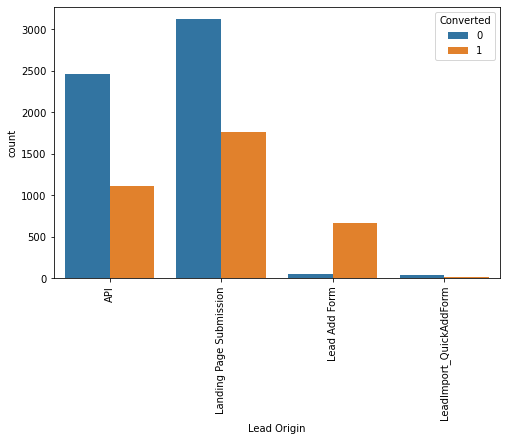

In [84]:
# Visualizing count of Lead Origin based on Converted value

plt.figure(figsize=(8,5))

plot1 = sns.countplot(x= 'Lead Origin', hue='Converted', data=lead_df)

plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)

plt.show()

### Inference:
1. API and Landing Page Submission has higher number of leads as well as conversion.
2. Lead Add Form has a very high conversion rate but count of leads are not very high.
3. Lead Import and Quick Add Form has got very few leads.


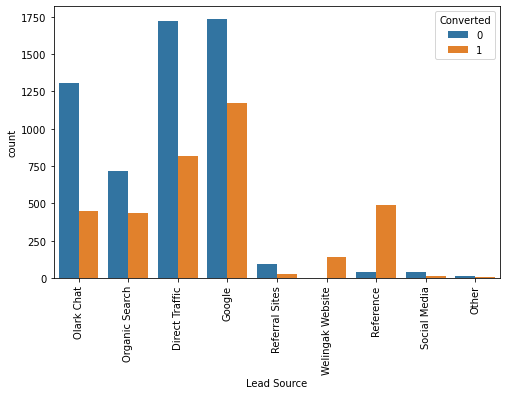

In [85]:
# Visualizing count of Lead Source based on Converted value

plt.figure(figsize=(8,5))

plot1 = sns.countplot(x= 'Lead Source', hue='Converted', data=lead_df)

plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)

plt.show()

### Inference
1. Google and Direct Traffic has higher number of leads as well as good conversion.
2. Reference has a very high conversion rate but count of leads are not very high.
3. Social Media, Referral Sites and other sites has got very few leads.
    

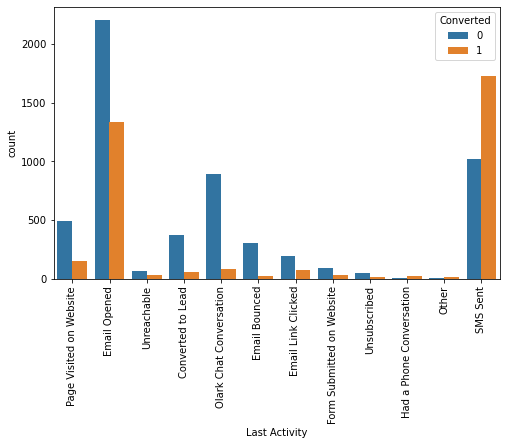

In [86]:
# Visualizing count of Last Activity based on Converted value

plt.figure(figsize=(8,5))

plot1 = sns.countplot(x= 'Last Activity', hue='Converted', data=lead_df)

plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)

plt.show()

### Inference
Email Opened and SMS sent has higher number of leads as well as conversion.
For SMS Sent conversion is very high.


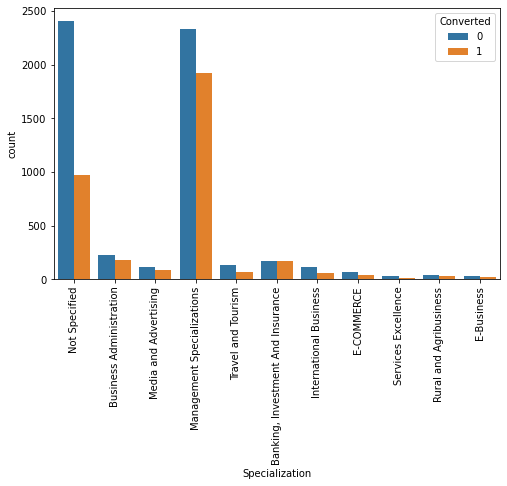

In [87]:
# Visualizing count of Specialization based on Converted value

plt.figure(figsize=(8,5))

plot1 = sns.countplot(x= 'Specialization', hue='Converted', data=lead_df)

plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)

plt.show()

### Inference
Management specialization has very good number of leads as well as conversion.

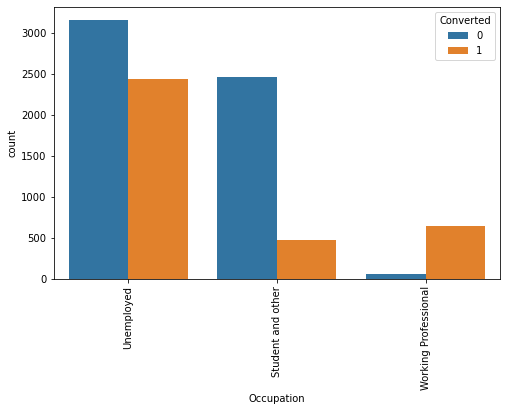

In [88]:
# Visualizing count of Occupation based on Converted value

plt.figure(figsize=(8,5))

plot1 = sns.countplot(x= 'Occupation', hue='Converted', data=lead_df)

plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)

plt.show()

### Inference
Unemployed category has good leads as well as conversion. This can be due to the reason they want a job so upskilling is a point of interest for them and they also have the time to dedicate to it. Working professional has high conversion rate but few leads.

### Continuing with data preparation
#### Creating dummies for multi-class variables

In [89]:
dummy1 = pd.get_dummies(lead_df[['Lead Origin','Lead Source','Last Activity','Specialization','Occupation']],drop_first=True)

lead_df = pd.concat([lead_df,dummy1],axis = 1)

In [90]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_LeadImport_QuickAddForm,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Occupation_Unemployed,Occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student and other,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [91]:
lead_df.drop(['Lead Origin','Lead Source','Last Activity','Specialization','Occupation'],axis=1,inplace=True)

#### Outlier Treatment

Let's check continuous variables and see whether they have any outliers or not and if so then lets see how to treat them.

In [92]:
lead_df['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [93]:
lead_df['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [94]:
lead_df['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

Observations - Looks like 'Page Views Per Visit' and 'TotalVisits' have outliers. Let's examine further more.

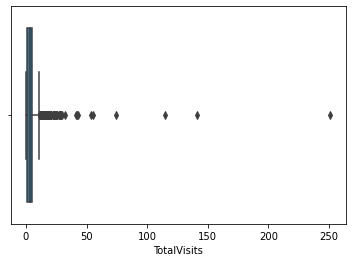

In [95]:
sns.boxplot(lead_df.TotalVisits)
plt.show()

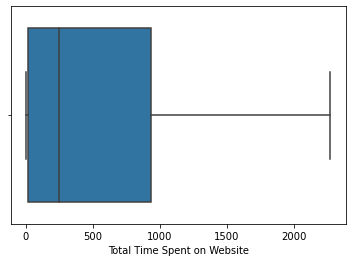

In [96]:
sns.boxplot(lead_df['Total Time Spent on Website'])
plt.show()

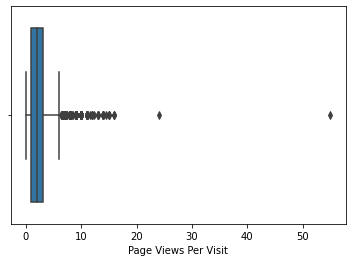

In [97]:
sns.boxplot(lead_df['Page Views Per Visit'])
plt.show()

In [98]:
lead_df['Page Views Per Visit'].quantile([0.5,0.7,0.8,0.85,0.9,0.95,0.99,1])

0.50     2.0
0.70     3.0
0.80     4.0
0.85     4.0
0.90     5.0
0.95     6.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64

In [99]:
lead_df['TotalVisits'].quantile([0.5,0.7,0.8,0.85,0.9,0.95,0.99,1])

0.50      3.0
0.70      4.0
0.80      5.0
0.85      6.0
0.90      7.0
0.95     10.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

In [100]:
lead_df.TotalVisits = lead_df.TotalVisits.astype(int)

In [101]:
lead_df['Page Views Per Visit'] = lead_df['Page Views Per Visit'].astype(int)

#### Capping at 99 percentile for Page Views Per Visit and TotalVisits.

In [102]:
lead_df.TotalVisits.loc[lead_df.TotalVisits >= lead_df.TotalVisits.quantile(0.99)] = lead_df.TotalVisits.quantile(0.99)
lead_df['Page Views Per Visit'].loc[lead_df['Page Views Per Visit'] >= 
                            lead_df['Page Views Per Visit'].quantile(0.99)] = lead_df['Page Views Per Visit'].quantile(0.99)

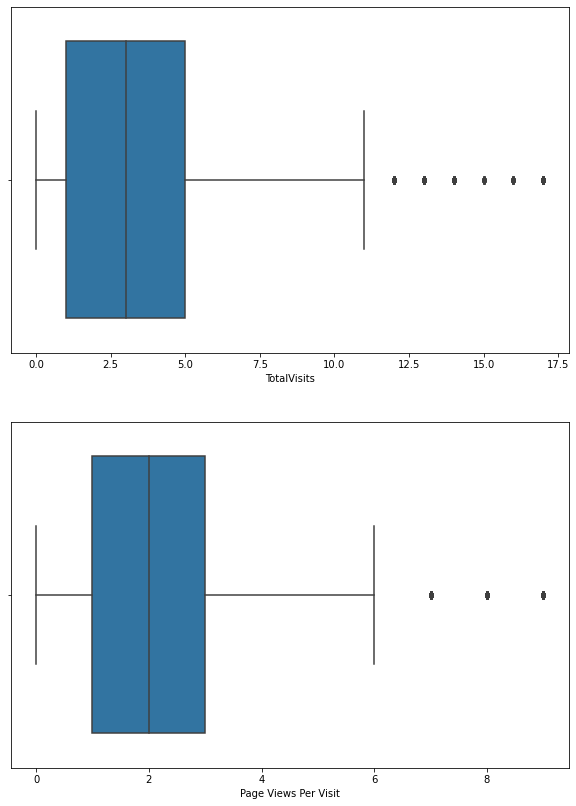

In [103]:
plt.figure(figsize = (10, 14))

plt.subplot(2,1,1)
sns.boxplot(lead_df.TotalVisits)

plt.subplot(2,1,2)
sns.boxplot(lead_df['Page Views Per Visit'])
plt.show()

After capping the outlier is significantly dropped which should be fine for analysis.

#### Numerical Variable Analysis

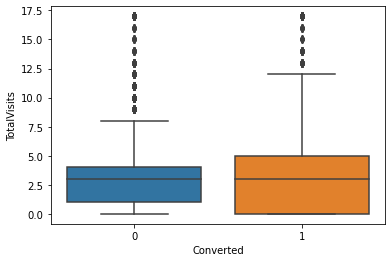

In [104]:
#checking "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)
plt.show()

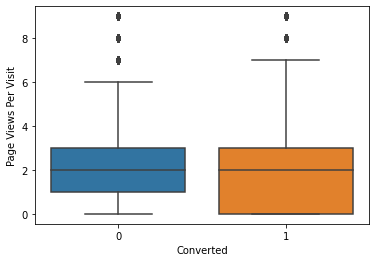

In [105]:
#checking "Page Views Per Visit" vs Converted variable
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_df)
plt.show()

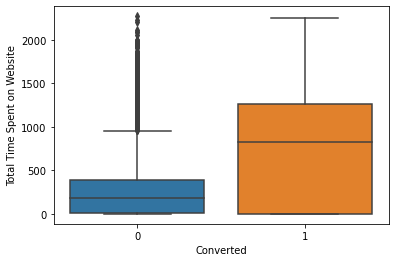

In [106]:
#checking "Total Time Spent on Website" vs Converted variable

sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df)
plt.show()

Observations -
1. From the above 3 plots, it in inferred that leads spending more time on website is tend to be converted.
2. The median for converted and non-converted are almost same for both Total Visits and Pages views. 
3. The maximum value for both Total visits and Pages views is more in converted leads than non -converted.


## Step 5: Looking at Correlations

In [ ]:
# Let's see the correlation matrix 
plt.figure(figsize = (35,30))        # Size of the figure
sns.heatmap(lead_df.corr(),annot = True)
plt.show()

Let's drop one of the highly co-related columns Lead Origin_Lead, Import_QuickAddForm which has the highest correlation coefficient. Let's not drop other columns as of now.

In [ ]:
def top_10_corr(var):
    
    corr_1 = var.corr()
    corr_df = corr_1.where(np.triu(np.ones(corr_1.shape), k=1).astype(np.bool))
    corr_df = corr_df.unstack().reset_index()
    corr_df.columns = ['VAR1', 'VAR2', 'Correlation']
    corr_df.dropna(subset = ['Correlation'], inplace = True)
    corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()
    x = corr_df.sort_values(by = 'Abs_Correlation', ascending = False,ignore_index = True).head(10)
    return x

In [ ]:
top_10_corr(lead_df)

In [ ]:
lead_df.drop('Lead Origin_LeadImport_QuickAddForm', axis =1, inplace = True)

In [ ]:
# Let's see the correlation matrix 
plt.figure(figsize = (35,30))        # Size of the figure
sns.heatmap(lead_df.corr(),annot = True)
plt.show()

In [ ]:
lead_df.info()

## Step 6: Model Building
#### Test-Train Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = lead_df.drop(['Converted'],axis =1)
X.head()

In [ ]:
y = lead_df['Converted']
y.head()

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

X_train.head()

In [ ]:
### Checking the Conversion Rate
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

The conversion rate is around 38 %

#### Running First Model with all features

In [ ]:
import statsmodels.api as sm

In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

Let's do RFE for Feature selection

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]

In [ ]:
X_train.columns[~rfe.support_]

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

As we can see that all features are having vif values less than 5, hence there is no multicollinearity issue in the dataset. Also, the p values seem to be in range.

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

In [ ]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

In [ ]:
# Predicted     not_converted    converted
# Actual
# not_converted        3553      449
# converted            719        1747  

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

### Metrics beyond simply accuracy

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

### Plotting the ROC Curve

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

## ROC Plotting

1. ROC curve shows the trade off between sensitivity and specificity - means if sensitivity increases specificity will decrease.
2. The curve closer to the left side border than right side of the border is more accurate.
3. The curve closer to the 45-degree diagonal of the ROC space is less accurate.

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Points to be concluded from above ROC curve -

The curve is closer to the left side of the border than to the right side hence our model is having great accuracy.
The area under the curve is 89% of the total area.

### Finding Optimal Cutoff Point

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


As we can see from the above data we have created points for accuracy, sensitivity and specificity for all probability points from 0 to 0.9. Out of this we have to choose one as a cutoff point and it is probability cutoff = 0.4 because all the accuracy, sensitivity and specificity are having nearly same value which is an ideal point to consider as we can't ignore any one from the three.


Let's plot this data and see the convergent point or meeting point for all three points: 'accuracy' , 'sensitivity' and 'specificity'.

In [ ]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above curve, 0.4 is the optimum point for taking probability cutoff as the meeting point is slightly before from 0.4 hence final cutoff we choose is 0.40. Also we can see that there is a trade off between sensitivity and specificity.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

### Precision and Recall

#### Looking at the confusion matrix again

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

In [ ]:
# Printing Precision and Recall score
print('Precision Score',confusion[1,1]/(confusion[0,1]+confusion[1,1]))
print('Recall Score',confusion[1,1]/(confusion[1,0]+confusion[1,1]))


Important point to be noted from the outcomes for precision and recall score -

Our precison percentage is 75% approximately and recall percentage is 77%.
This means we have very good model which explains relevancy of 75% and true relevant results about 77%.

It is good to consider the recall percentage more valuable than precision because it is okay if precision is a bit low which means less hot lead customers. It is not good to leave out any hot leads who are willing to get converted.


As we all know that Precision and Recall are inversely related means if one increases other will genuinely decrease. Hence we need to see the trade off between these two. Let's check that in below graph.

In [ ]:
# Import precision and recall score from sklearn library
from sklearn.metrics import precision_score, recall_score

In [ ]:
# Precision score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [ ]:
# Recall score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [ ]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [ ]:
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-") # Plotting Precision
plt.plot(thresholds, r[:-1], "r-") # Plotting Recall
plt.show()

As we can see that there is a trade off between Precision and Recall and the meeting point is nearly at 0.4.

## Step 7: Making Prediction on Test set

#### Scaling test set

In [ ]:
X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

X_test.head()

In [ ]:
X_test = X_test[col]
X_test.head()

In [ ]:
# Add constant
X_test_sm = sm.add_constant(X_test)

#### Making predictions on test set

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [ ]:
y_pred_final.head()

In [ ]:
# Rearranging the columns

y_pred_final = y_pred_final[['Lead Number','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [ ]:
y_pred_final.head()

In [ ]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

Final Observation:
Let us compare the values obtained for Train & Test:

Train Data: 

Accuracy :    81.49%
Sensitivity : 70.84%
Specificity : 88.78%

Test Data: 

Accuracy :    81.63%
Sensitivity : 76.71%
Specificity : 84.85%

The Model seems to predict the Conversion Rate very well and we should be able to give the Company confidence in making good calls based on this model.